In [105]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from pyswarms.single.global_best import GlobalBestPSO
from pyswarms.utils.functions import single_obj as fx
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pyswarm import pso



In [67]:
exchange_data = pd.read_csv('forex_data_10y.csv')
exchange_data.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,25-Aug-20,74.327,74.100,74.335,74.075,0.92K,0.22%
1,24-Aug-20,74.168,74.922,74.922,73.962,4.90K,-1.01%
2,23-Aug-20,74.922,74.922,74.922,74.922,0,0.00%
3,21-Aug-20,74.920,74.980,75.005,74.820,3.16K,-0.12%
4,20-Aug-20,75.012,74.973,75.132,74.935,3.70K,0.22%


In [68]:
exchange_data["Date"] = pd.to_datetime(exchange_data["Date"])
ind_exchange_data = exchange_data.set_index(["Date"], drop=True)

In [69]:
ind_exchange_data.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2020-08-25,74.327,74.100,74.335,74.075,0.92K,0.22%
2020-08-24,74.168,74.922,74.922,73.962,4.90K,-1.01%
2020-08-23,74.922,74.922,74.922,74.922,0,0.00%
2020-08-21,74.920,74.980,75.005,74.820,3.16K,-0.12%
2020-08-20,75.012,74.973,75.132,74.935,3.70K,0.22%


In [70]:
data_frame = ind_exchange_data.sort_index(axis=1 ,ascending=True)
data_frame = data_frame.iloc[::-1]
data_frame.head()

,Chg%,High,Low,Open,Price,Volume
Date,,,,,,
2010-09-13,0.05%,46.415,46.100,46.220,46.310,0
2010-09-14,-0.09%,46.465,46.070,46.270,46.270,0
2010-09-15,-0.15%,46.460,46.080,46.160,46.200,0
2010-09-16,-0.12%,46.415,46.075,46.145,46.145,0
2010-09-17,-0.63%,46.128,45.785,46.085,45.855,0


<AxesSubplot:xlabel='Date'>

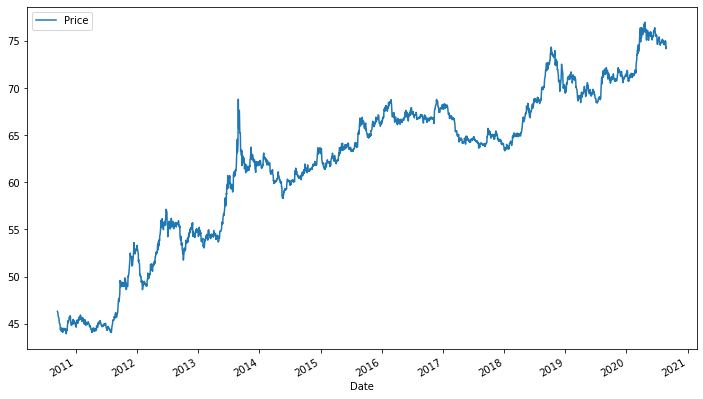

In [71]:
df = data_frame[["Price"]]

#plotting dataset to visualize the pattern of prices over the years

df.plot(kind='line',figsize=(12,7))

In [72]:
diff = df.index.values[-1] - df.index.values[0]

days = diff.astype('timedelta64[D]')
days = days / np.timedelta64(1, 'D')
years = int(days/365)
print("Total data: %d years"%years)
print("80 percent data = 2010 to %d"%(2010 + int(0.8*years)))

Total data: 9 years
80 percent data = 2010 to 2017


In [73]:
df.describe()

,Price
count,2598.000000
mean,61.972875
std,8.449870
min,43.925000
25%,55.460000
50%,64.017500
75%,67.836500
max,76.975000


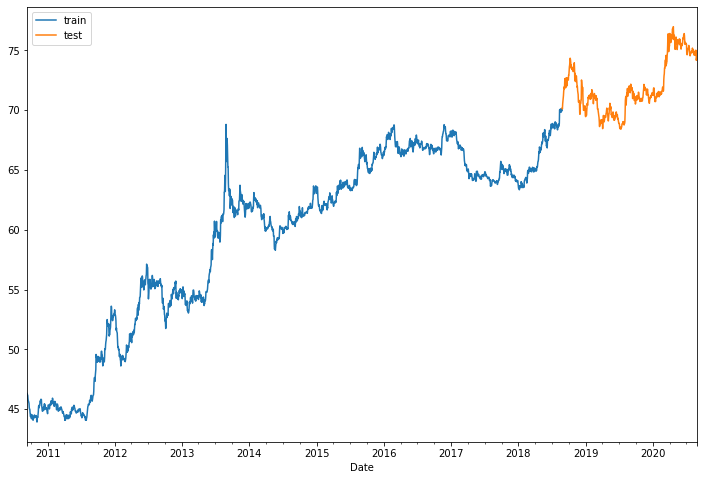

In [74]:
split_date = pd.Timestamp('26-08-2018')

train = df.loc[:split_date]
test = df.loc[split_date:]

ax = train.plot(kind='line',figsize=(12,8))
test.plot(ax=ax,kind='line',figsize=(12,8))
plt.legend(['train', 'test'])

In [75]:
sc = StandardScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [76]:
#use the previous price to predict the next 
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]


In [77]:
train_input = []
train_output = []
timesteps = 5

for i in range(timesteps, train.shape[0]):
    train_input.append(train_sc[i-timesteps:i, 0])
    train_output.append(train_sc[i, 0])

train_input = np.array(train_input)
train_output = np.array(train_output)

#train_input = np.reshape(train_input, (train_input.shape[0], train_input.shape[1], 1))



In [78]:
test_input = []
test_output = []
timesteps = 5

for i in range(timesteps, test.shape[0]):
    test_input.append(test_sc[i-timesteps:i, 0])
    test_output.append(test_sc[i, 0])

    
test_input = np.array(test_input)
test_output = np.array(test_output)
#test_input = np.reshape(test_input, (test_input.shape[0], test_input.shape[1], 1))








In [127]:
def optimize_nn_with_pso(x, *args):
    # x contains the neural network hyperparameters
    # number of neurons in the hidden layer, learning rate, and momentum
    n_neurons, lr, mom = x

    # Create the model
    model = Sequential()
    model.add(Dense(n_neurons, input_dim=1, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer="adam", metrics=["accuracy"])
    # Train the model
    history = model.fit(X_train, y_train, epochs=100, verbose=0)

    # Evaluate the model on the test data
    score = model.predi(X_test, verbose=0)
    return score[0]

In [128]:

lb = [10, 0.01, 0.1]
ub = [100, 0.1, 0.9]

In [130]:
xopt, fopt = pso(optimize_nn_with_pso,lb,ub, maxiter=100, swarmsize=50)


ValueError: in user code:

    C:\Users\Yamin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Yamin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Yamin\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Yamin\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Yamin\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Yamin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\Yamin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:756 train_step
        _minimize(self.distribute_strategy, tape, self.optimizer, loss,
    C:\Users\Yamin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2736 _minimize
        gradients = optimizer._aggregate_gradients(zip(gradients,  # pylint: disable=protected-access
    C:\Users\Yamin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:562 _aggregate_gradients
        filtered_grads_and_vars = _filter_grads(grads_and_vars)
    C:\Users\Yamin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:1270 _filter_grads
        raise ValueError("No gradients provided for any variable: %s." %

    ValueError: No gradients provided for any variable: ['dense_72/kernel:0', 'dense_72/bias:0', 'dense_73/kernel:0', 'dense_73/bias:0'].


In [ ]:
final_model = Sequential()
final_model.add(Dense(int(xopt[0]), input_dim=train_data.shape[1], activation="relu"))
final_model.add(Dense(1))
final_model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
final_model.fit(train_data, epochs=100, verbose=0)